# TP 1

## Ejercicio 1
Implementar un Generador Congruencial Lineal (GCL) de módulo 232 , multiplicador 1013904223,
incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón
de los integrantes del grupo.
* Modificar el GCL implementado para obtener números al azar entre 0 y 1
* Realizar los gráficos que considere adecuados para mostrar las distribuciones de números
al azar generados en ambos casos

### Resolución

El codigo anterior muestra la implementacion de un GLC propuesta por el grupo

In [1]:
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt


class GLC:

    def __init__(self, module, multiplier, seed, increment):
        self.modNumber = module
        self.scalarNumber = multiplier
        self.first = seed
        self.constant = increment
        self.actual = self.first

    def calculate_random(self):
        new_actual = ((self.actual * self.scalarNumber) + self.constant) % self.modNumber
        self.actual = new_actual
        return new_actual

    def calculate_random_uniform(self):
        return (self.calculate_random()) / self.modNumber

    def calculate_multiple_random_uniform(self, iterations):
        values = []
        for i in range(iterations):
            value = self.calculate_random_uniform()
            values.append(value)
        return values
    
    def calculate_multiple_random(self, iterations):
        values = []
        for i in range(iterations):
            value = self.calculate_random()
            values.append(value)
        return values
    
    def calculate_multiple_random_with_range(self, iterations, _min, _max):
        values = []
        for i in range(iterations):
            value = self.calculate_random() % 7
            while (value > _max) or (_min > value):
                value = self.calculate_random() % 7
            values.append(value)
        return values
    
    def gt_than_before(self, dic, value):
        for i in range(value):
            if dic[value] <  dic[i]:
                return False
        return True
    
    def smaller_than_further(self, dic, value, top):
        for i in range(value+1, top + 1):
            if dic[value] > dic[i]:
                return False
        return True
    
    def calculate_multiple_random_with_module(self, iterations):
        values = []
        dic = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
        contador = 0
        while (contador != iterations):
            value = self.calculate_random()
            if value == 0:
                if (dic[1] >= dic[0]):
                    values.append(value)
                    dic[value] += 1
                    contador += 1
            elif value == 8:
                if (dic[8] >= dic[7]):
                    values.append(value)
                    dic[value] += 1
                    contador += 1
            elif self.gt_than_before(dic, value) and self.smaller_than_further(dic, value, 8):
                values.append(value)
                dic[value] += 1
                contador += 1
        print(dic)
        return values

    def create_plot_uniform(self, quantity):
        random_values = self.calculate_multiple_random_uniform(quantity)
        num_bins = 9
        plt.hist(random_values, num_bins, facecolor='blue', alpha=0.5, ec='black')
        plt.show()
    
    def create_plot(self, quantity):
        random_values = self.calculate_multiple_random(quantity)
        num_bins = 10
        plt.hist(random_values, num_bins, facecolor='blue', alpha=0.5, ec='black')
        plt.show()
        
    def create_plot_with_difference(self, data):
        _counter = Counter({2:2730, 3:5200, 4:1730, 5:480, 6:220})
        _data_given = [2] * 2730
        _data_given += [3] * 5200
        _data_given += [4] * 1730
        _data_given += [5] * 480
        _data_given += [6] * 220
        num_bins = 5
        plt.figure(figsize=(8,6))
        plt.hist(_data_given, bins=num_bins, alpha=0.5, label="data1")
        plt.hist(data, bins=num_bins, alpha=0.5, ec='black', label='data2')
        plt.show()
    
    def create_counter(self, iterations, possible_numbers):
        random_values = self.calculate_multiple_random(iterations)
        counter = Counter(random_values)
        if len(counter) != possible_numbers:
            return None
        if len(set(counter.values())) != possible_numbers:
            return None
        return counter
    
    def plot_counter(self, data):
        density, bins, _ = plt.hist(data, density=True, bins=20)
        count, _ = np.histogram(data, bins)
        for x,y,num in zip(bins, density, count):
            if num != 0:
                plt.text(x, y+0.05, num, fontsize=10, rotation=-90) # x,y,str
                
    def chequear_dif(self, data):
        counter = Counter(data)
        for i in [2,3,4,5,6]:
            if not i in counter.keys():
                return 10000
        score = abs(2730 - counter[2])
        score += abs(5200 - counter[3])
        score += abs(1730 - counter[4])
        score += abs(480 - counter[5])
        score += abs(220 - counter[6])
        return score



A continuacion, se muestran distintos ejemplos con diferentes numeros de iteraciones para distribución no uniforme

In [2]:
_seed = (98541 + 100033 + 95282 + 94839) / 4
glc = GLC(module=232, 
          multiplier=1013904223,
          seed=97174, 
          increment=1664525)

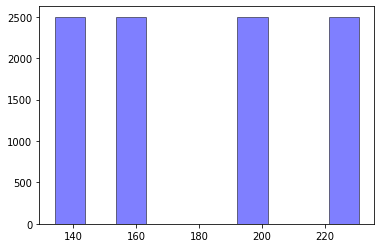

In [3]:
glc.create_plot(10000)

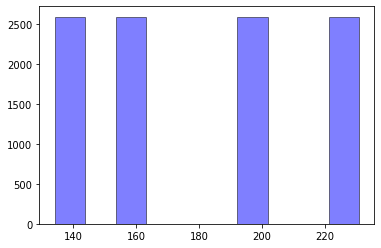

In [4]:
glc.create_plot(10349)

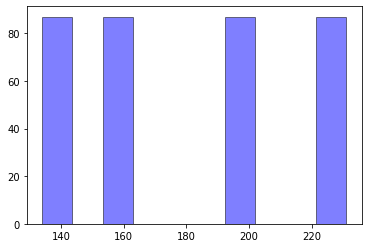

In [5]:
glc.create_plot(348)

A continuacion, se muestran distintos ejemplos con diferentes numeros de iteraciones para distribución uniforme

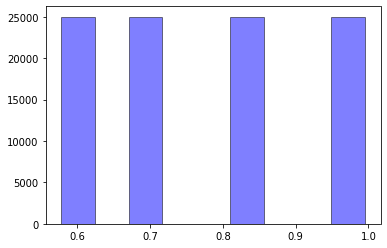

In [6]:
glc.create_plot_uniform(100000)

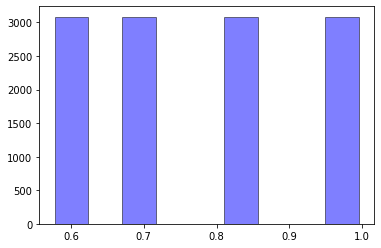

In [7]:
glc.create_plot_uniform(12341)

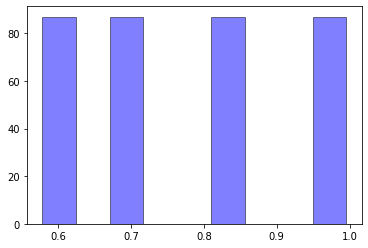

In [8]:
glc.create_plot_uniform(348)

## Ejercicio 2

Dada una variable aleatoria X se generaron 10.000 muestras y se obtuvo el siguiente histograma

* Utilizando el GCL implementado en el Ejercicio 1 a), desarrollar un algoritmo para generar 100.000 muestras de la variable X
* Proponer un test para evaluar si las muestras generadas en el ítem a) siguen la distribución esperada. Considerar distintos tamaños de muestra.

### Resolución

Se utiliza la misma implementación de GLC utilizada en el primer ejercicio

Sabiendo que las reglas son

* module > 0 
* 0<multiplier<module
* 0<=increment<module 
* 0<=seed<module

11
191
260
260


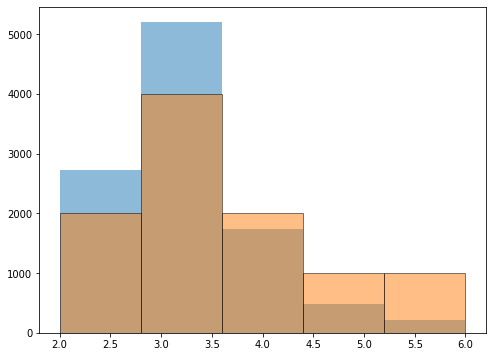

In [9]:
glc = GLC(module=13, 
          multiplier=1013904223,
          seed=97174, 
          increment=10)
a = glc.calculate_multiple_random_with_range(10000,2, 7)

def xx():
    glc = None
    dif = 10000
    module = 10
    for i in range(10, 270):
        new_glc = GLC(module=i, multiplier=1013904223, seed=97174, increment=10)
        data = new_glc.calculate_multiple_random_with_range(10000,2, 7)
        new_dif = new_glc.chequear_dif(data)
        if dif > new_dif:
            glc = new_glc
            dif = new_dif
            module = i
            print(module)
    print(module)
    return glc
        
glc = xx()
a = glc.calculate_multiple_random_with_range(10000,2, 7)
glc.create_plot_with_difference(a)

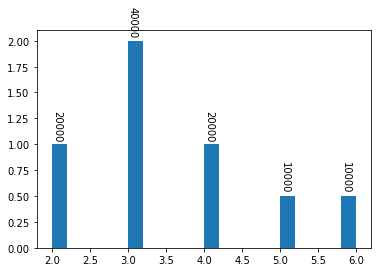

In [10]:
glc = GLC(module=260, multiplier=1013904223, seed=97174, increment=10)
data = glc.calculate_multiple_random_with_range(100000, 2, 7)
glc.plot_counter(data)

## Ejercicio 3

Implementar un método para generar variables aleatorias con distribución normal de media 15 y desvío 2.

* Generar 100.000 muestras, calcular la media y la varianza de la distribución obtenida y
comparar con los valores teóricos.
* Calcular el factor de rendimiento del método propuesto.
* Mostrar gráficamente la distribución que siguen las muestras generadas.
* Proponer un test para verificar si los números generados siguen la distribución pedida.

### Resolución

Para este ejercicio usaremos el método de Aceptación - Rechazo

In [11]:
import random
import math
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chisquare
import numpy as np

### a) Generar 100.000 muestras, calcular la media y la varianza de la distribución obtenida y comparar con los valores teóricos.

In [12]:
media = 15 # dato del enunciado
desvio = 2 # dato del enunciado
muestras = 100_000 # dato del enunciado
c = 1.3 # es fx/fy que maximiza el cociente

In [13]:
resultados = []

def cociente(t):
    # es la division de fx/c*fy
    return (1 / math.sqrt(2 * math.pi)) * math.exp(t - (t**2 / 2)) * 1/c

for i in range(muestras):
    t = random.expovariate(1) # muestra exponencial de media 1
    u = random.random()
    if u < cociente(t):
        u2 = random.random()
        if u2 < 0.5:
            resultados.append(t)
        else:
            resultados.append(-t)

In [14]:
# aplicamos transformacion de Normal std a lo pedido
transformada = [r * desvio + media for r in resultados]

In [15]:
print(f'Esperanza real: {media} - Esperanza simulada: {np.mean(transformada)}')
print(f'Varianza real: {desvio**2} - Varianza simulada: {np.var(transformada)}')


Esperanza real: 15 - Esperanza simulada: 15.014782408811255
Varianza real: 4 - Varianza simulada: 4.011712537807307


### b) Calcular el factor de rendimiento del método propuesto.

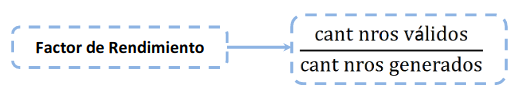

In [16]:
numeros_validos = len(transformada)

In [17]:
factor_rendimiento = numeros_validos / muestras

In [18]:
print(f"El factor de rendimiento del método propuesto es {round(factor_rendimiento, 2)}")

El factor de rendimiento del método propuesto es 0.38


### c) Mostrar gráficamente la distribución que siguen las muestras generadas.

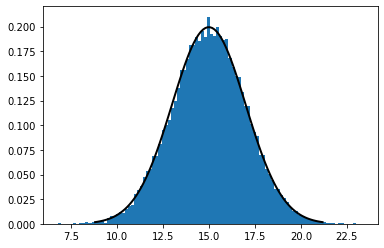

In [19]:
# creo la normal real para plotear la curva y comparar
x_real = np.linspace(norm.ppf(0.001, media, desvio), norm.ppf(0.999, media, desvio), 100)
fig, ax = plt.subplots(1, 1)

y_real = norm(media, desvio)
ax.plot(x_real, y_real.pdf(x_real), 'k-', lw = 2)

ax.hist(transformada, 100, density=True)
plt.show()

### d) Proponer un test para verificar si los números generados siguen la distribución pedida.

Para verificar si los numeros generados siguen la distribución pedida usaremos un test estadístico.
El que usaremos es el método de chi^2, que justamente consiste en comparar 2 distribuciones de probabilidades:
- una la obtuvimos simulando, la llamaremos observada
- la otra es la que el experimento sigue, la llamaremos esperada

Cuanto más chica sea la diferencia entre ambas, más podemos confirmar que siguen la distribución pedida.

Además, como es una variable continua, tendremos que discretizar. Para eso tomaremos los valores del experimento truncando los decimales.

In [20]:
freq_esperadas = [0.0001, 0.0004, 0.002, 0.0175, 0.03, 0.075, 0.10, 0.175, 0.2, 0.175, 0.10, 0.075, 0.03, 0.0175, 0.002, 0.0004, 0.0001]

In [21]:
observados = [round(i) for i in transformada]

In [22]:
observados = [round(i) for i in observados if (i > 6 & i < 23)]

In [23]:
cantidad_valores_distintos = len(set(observados))

In [24]:
cantidad_valores_distintos

17

In [25]:
# cuento las apariciones
# para respetar el orden posicional en la lista, le resto el mínimo
min_value = min(observados)
observados_count = [0 for i in range(cantidad_valores_distintos)]
for i in observados:
    observados_count[i - min_value] += 1

In [26]:
len(observados_count)

17

In [27]:
cantidad = len(observados)
freq_observados = [i/cantidad for i in observados_count]

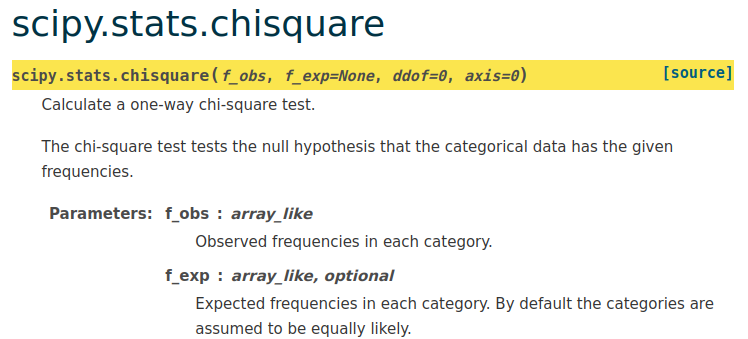

In [28]:
statistic, pvalue = chisquare(freq_observados, f_exp=freq_esperadas)

print(statistic)
print(pvalue)

#si pvalue <= alfa entonces rechazo H0 (digo que son distintas)

if pvalue <= 0.05:
    print("Las distribuciones NO se parecen")
else:
    print("Las distribuciones coinciden")

0.019203454338197274
1.0
Las distribuciones coinciden


## Ejercicio 4

La llegada de vehículos a un estacionamiento sigue un proceso de Poisson de tasa λ
vehículos/hora. En el trabajo práctico se incluye un archivo con números pseudoaleatorios que
representan los tiempos entre arribos de dichos vehículos.

* Realice una estimación de la tasa de arribos y proponga un test para evaluar si los números pseudoaleatorios provistos siguen la distribución esperada.
* Utilizando el GCL implementado en el Ejercicio 1 a) simular la llegada de vehículos durante un mes. Graficar la cantidad de arribos en función del tiempo.
* Generar 1000 realizaciones del proceso de Poisson para estimar las siguientes probabilidades:
1. Probabilidad que el primer vehículo arribe antes de los 10 minutos.
2. Probabilidad que el undécimo vehículo arribe después de los 60 minutos.
3. Probabilidad que arriben al menos 750 vehículos antes de las 72 horas.
Comparar con los valores teóricos.

Estimación en minutos: 6.067196631701471
Poisson real de media 6.067196631701471


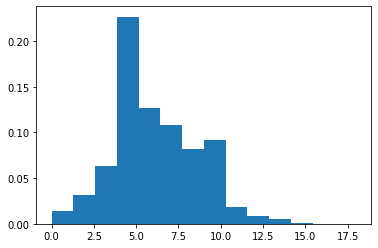

Distribución del archivo de media 6.067196631701471


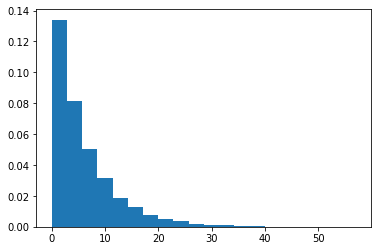

In [93]:
# Buscamos primero el valor promedio
def valor_promedio():    
    with open('message.txt', 'r') as file:
        suma = 0
        cantidad_de_numeros = 0
        for valor in file:
            suma += float(valor) * 60
            cantidad_de_numeros +=1
        return suma / cantidad_de_numeros

valor_promedio = valor_promedio()
print(f'Estimación en minutos: {valor_promedio}')

# Ahora graficamos el proceso de Poisson con el lambda obtenido
from numpy import random
import matplotlib.pyplot as plt

print(f"Poisson real de media {valor_promedio}")
poisson = random.poisson(lam=valor_promedio, size=10000)
count, bins, ignored = plt.hist(poisson, 14, density=True)
plt.show()

# Graficamos el archivo

with open('message.txt', 'r') as file:
    file_values = []
    for valor in file:
        file_values.append(float(valor) * 60)

print(f"Distribución del archivo de media {valor_promedio}")
count, bins, ignored = plt.hist(file_values, 20, density=True)
plt.show()


### Test para evaluar distribuciones

En este caso realizaremos lo mismo que en el punto 3

In [122]:
poisson = list(poisson)

In [123]:
cantidad_valores_distintos_poisson = len(set(poisson))
cantidad_valores_distintos_poisson

19

In [124]:
# cuento las apariciones
# para respetar el orden posicional en la lista, le resto el mínimo
min_value = min(poisson)
count_poisson = [0 for i in range(cantidad_valores_distintos_poisson)]
for i in poisson:
    count_poisson[i - min_value] += 1

In [127]:
len(poisson)

10000

In [128]:
cantidad = sum(count_poisson)
freq_poisson = [i/cantidad for i in count_poisson]

In [137]:
sum(freq_poisson)

0.9999999999999999

In [130]:
# discretizo los valores obtenidos desde el archivo
file_values = [round(i) for i in file_values]

In [131]:
print(min(file_values))
print(max(file_values))

0
18


En la poisson simulada, tengo valores desde el 0 hasta el 18. Para que las distribuciones sean comparables, tomo como heurística truncar los valores despues del 18.
Otro approach que se podia tomar era agregar probabilidades muy pequeñas desde el 18 al 57 de la poisson original.

In [132]:
maximo_poisson = max(poisson)
file_values = [i for i in file_values if (i <= maximo_poisson)]

In [133]:
cantidad_valores_distintos_file = len(set(file_values))
cantidad_valores_distintos_file

19

In [134]:
# cuento las apariciones
# para respetar el orden posicional en la lista, le resto el mínimo
min_value = min(file_values)
count_file = [0 for i in range(cantidad_valores_distintos_file)]
for i in file_values:
    count_file[i - min_value] += 1

In [135]:
cantidad = sum(count_file)
freq_file = [i/cantidad for i in count_file]

In [136]:
sum(freq_file)

1.0

In [138]:
statistic, pvalue = chisquare(freq_file, f_exp=freq_poisson)

print(statistic)
print(pvalue)

#si pvalue <= alfa entonces rechazo H0 (digo que son distintas)

if pvalue <= 0.05:
    print("Las distribuciones NO se parecen")
else:
    print("Las distribuciones coinciden")

7.9594295927458205
0.9792343554036398
Las distribuciones coinciden


### Simulación con GCL

{0: 2, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 997}


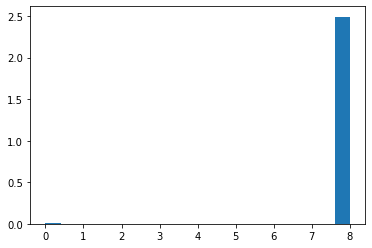

In [30]:
_seed = (98541 + 100033 + 95282 + 94839) / 4
glc = GLC(module=9, 
          multiplier=4,
          seed=0, 
          increment=1)
dist = glc.calculate_multiple_random_with_module(1000)
count, bins, ignored = plt.hist(dist, 20, density=True)
plt.show()


### Simulaciones con Poisson

### 1. Probabilidad que el primer vehículo arribe antes de los 10 minutos.

Realizo 1000 veces el experimento de Poisson con media 6.06 y cuento cuantas veces el primero llega antes de los 10 minutos.

In [185]:
lam = 6.06
realizaciones = 1000
limite = 10

exitos = 0
for i in range(realizaciones):
    poisson = random.poisson(lam=lam, size=5)
    if poisson[0] < limite:
        exitos += 1

print(f'[SIMULACION] La probabilidad de que el primer vehiculo arribe antes de los 10 minutos es {exitos/realizaciones}')

[SIMULACION] La probabilidad de que el primer vehiculo arribe antes de los 10 minutos es 0.907


In [49]:
from collections import Counter
from math import factorial, expdd

lam = 6.06
realizaciones = 1000
limite = 10


poisson = random.poisson(lam=lam, size=5)
contador = 0
for espera, repeticiones in Counter(poisson).items():
    if espera < limite:
        contador += repeticiones

### 2. Probabilidad que el undécimo vehículo arribe después de los 60 minutos.


Realizo 1000 veces el experimento de Poisson con 11 arribos y media 6,06. Sumo el tiempo de los 11 arribos de cada realización, y cuanto cuántas de esas suman 61 o más.

In [176]:
lam = 6.06
realizaciones = 1000
limite = 60
size = 11

exitos = 0
for i in range(realizaciones):
    poisson = random.poisson(lam=lam, size=size)
    if sum(poisson) > limite:
        exitos += 1

print(f'[SIMULACION] La probabilidad que el undécimo vehículo arribe después de los 60 minutos es {exitos/realizaciones}')

La probabilidad que el undécimo vehículo arribe después de los 60 minutos es 0.772


### 3. Probabilidad que arriben al menos 750 vehículos antes de las 72 horas.

Realizo 1000 veces el experimento de Poisson con 750 arribos y media 6,06. Sumo el tiempo de los 750 arribos de cada realización, y cuanto cuántas de esas suman 72 horas o menos.

In [184]:
lam = 6.06
realizaciones = 1000
limite = 60 * 72 # 60 min/hora * 72 hora
size = 750

exitos = 0
for i in range(realizaciones):
    poisson = random.poisson(lam=lam, size=size)
    if sum(poisson) < limite:
        exitos += 1

print(f'[SIMULACION] La probabilidad que arriben al menos 750 vehículos antes de las 72 horas es {exitos/realizaciones}')

La probabilidad que arriben al menos 750 vehículos antes de las 72 horas es 0.0


In [ ]:
Para este caso, tenemos que pensar en situaciones mas chicas. Dividiendo el intervalo de tiempo en 2 segmentos, tenemos de 0 a 60, y más de 60.
Entonces tenemos las situaciones:
- 0 autos llegan antes de los 60 minutos, y los restantes 11 luego de los 60
- 1 auto llega antes de los 60 minutos, y los restantes 10 luego de los 60
- 2 autos llegan antes de los 60 minutos, y los restantes 9 luego de los 60
- ...
- 10 autos llegan antes de los 60 minutos, y el restante luego de los 60
En esos 11 casos anteriores, el undecimo vehiculo arriba despues de los 60 minutos

## Ejercicio 5

Basados en el trabajo “Using Cellular Automata to Investigate Pedestrian Conflicts with Vehicles in
Crosswalk at Signalized Intersection”, de Xiaomeng Li, Xuedong Yan, Xingang Li, y Jiangfeng Wang
realizar lo siguiente:
* Simular al menos 2 escenarios planteados en el trabajo y comparar sus resultados.
* Proponer al menos 2 modificaciones a los escenarios planteados para peatones, autos, semáforos y arterias de circulación, simularlas y comparar estos resultados con los del ítem anterior.
* Realizar los gráficos que se consideren necesarios para mostrar los resultados
* Seleccionar un escenario de los simulados y realizar una animación.